# Análise e Previsão de Preço de Unidades Habitacionais

Este notebook visa prever o preço de UHs com base em suas características usando técnicas de machine learning. Irei fazer uma análise exploratória dos dados(EDA), testar modelos de regressão e avaliar seu desempenho.

**Importando Bibliotecas para Visualiçazão e Análise de Dados**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**importando dataset**

In [134]:
data = pd.read_csv('teste_indicium_precificacao.csv')
data

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**Verificando o nª de linhas e colunas do dataset(n_linhas, n_colunas)**

In [135]:
data.shape

(48894, 16)

**vendo os 5 primeiros registros do dataset**


In [136]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


**vendo os ultimos 5 registros do dataset**

In [137]:
data.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**vendo de forma aleatoria 5 linhas**

In [138]:
data.sample(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
11628,9047816,Beautiful Home 1 Stop from Midtown,2660650,Allan (& Max),Queens,Long Island City,40.74977,-73.93979,Private room,100,4,46,2019-06-29,1.18,1,284
28756,22217757,3-BR duplex in Bed-Stuy Brownstone,3616251,Michael,Brooklyn,Bedford-Stuyvesant,40.68376,-73.95109,Entire home/apt,66,3,41,2019-06-25,3.30,1,219
40865,31761090,Wall-size window Private Bedroom,238145460,Cindy,Brooklyn,Flatbush,40.63037,-73.95671,Private room,45,1,9,2019-06-24,1.72,1,129
23269,18842510,HuGe 8 Bed's / 2 Full Bath's + PRiVaTe BALCONY!!,31979360,Jacob,Brooklyn,Midwood,40.61421,-73.95347,Entire home/apt,111,90,0,NaN,NaN,1,365
41146,32006626,Blue House on the Hill,222386455,Herman,Brooklyn,Cypress Hills,40.68099,-73.89264,Entire home/apt,165,2,18,2019-07-01,3.78,1,61


# verificando todas as informações da base de dados

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

# verificando a quantidade de numeros nulos ou vazios em cada coluna

In [140]:
data.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

# verificando valores duplicados

In [141]:
data.duplicated().sum()

0

# verificando valores unicos

In [142]:
data.nunique()

id                               48894
nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

# Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Decidi filtrar os preços acima de 3000 para verificar se existe um padrão.

- Os dados filtrados abaixo mostram que eles frequentemente utilizam palavras-chave de luxo ou exclusividade, termos como: Luxury, VIP, Palace, Mansion.

- Muitas listagens também enfatizam bairros nobres de NY no título, como: Manhattan, SoHo, Upper East Side, Upper West Side.

- Algumas incluem menções a eventos que estão acontecendo no momento para justificar o alto valor, como por exemplo: Super Bowl.

In [143]:
filtro = data[data['price'] >= 3000]

# Mostrar o DataFrame filtrado
print(filtro)

             id                                               nome    host_id  \
945      363673                   Beautiful 3 bedroom in Manhattan     256239   
1861     826690                   Sunny, Family-Friendly 2 Bedroom    4289240   
2697    1448703                Beautiful 1 Bedroom in Nolita/Soho      213266   
3536    2110145                 UWS 1BR w/backyard + block from CP    2151325   
3694    2224896                NYC SuperBowl Wk 5 Bdrs River View    11353904   
3719    2243699                SuperBowl Penthouse Loft 3,000 sqft    1483320   
3773    2271504                   SUPER BOWL Brooklyn Duplex Apt!!   11598359   
3787    2281142                 Prime NYC Location for Super Bowl     1427243   
4344    2919330                   NearWilliamsburg bridge 11211 BK   14908606   
4375    2952861                               Photography Location    1177497   
4376    2953058                                      Film Location    1177497   
6529    4737930             

# Representações Gráficas

**Média de Preços Por Bairro**

É possível notar que o bairro Manhattan é o mais caro, talvez pela localização privilegiada e/ou pela grande concentração de UHs luxuosas

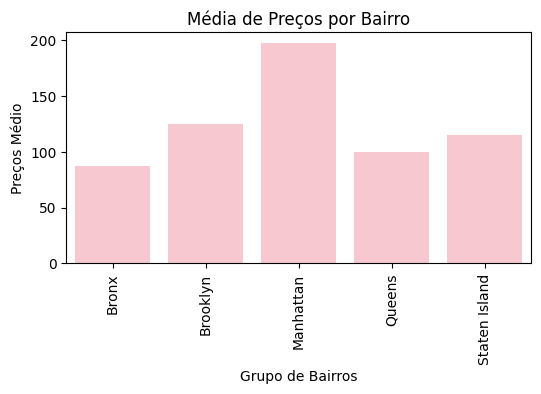

In [144]:
df_grouped = data.groupby('bairro_group')['price'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['bairro_group'], y=df_grouped['price'], color='pink')
plt.title('Média de Preços por Bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preços Médio')
plt.xticks(rotation=90)
plt.show()

**Média de noites por Tipo de Unidade Habitacional**

Nota-se que quem opta por apartamentos ou casas completas fica por mais noites. Provavelmente famílias de férias alugam este tipo de UH

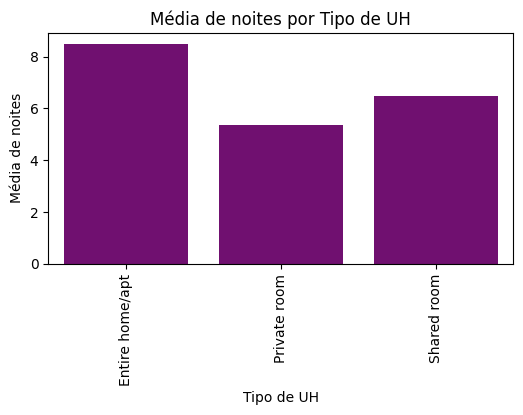

In [145]:
df_grouped = data.groupby('room_type')['minimo_noites'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['room_type'], y=df_grouped['minimo_noites'], color='purple')
plt.title('Média de noites por Tipo de UH')
plt.xlabel('Tipo de UH')
plt.ylabel('Média de noites')
plt.xticks(rotation=90)
plt.show()

**Média de concentração de concorrência por Bairro**

interessante notar que apesar de Manhattan possuir a maior concentração de concorrência(o que geralmente tende a baixar o preço), ainda assim, é o bairro mais caro

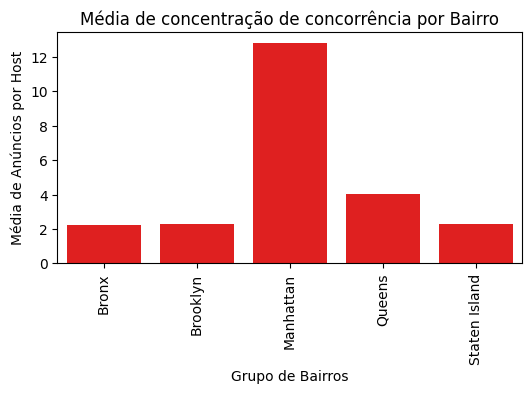

In [146]:
df_grouped = data.groupby('bairro_group')['calculado_host_listings_count'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['bairro_group'], y=df_grouped['calculado_host_listings_count'], color='red')
plt.title('Média de concentração de concorrência por Bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Média de Anúncios por Host')
plt.xticks(rotation=90)
plt.show()

**Média de dias em que o anúncio está disponível para reserva**

Seguindo um padrão interessante, Manhanttan apesar de ter muita concorrência, a média de dias em que o anúncio fica disponível para reserva é o segundo mais baixo da lista, isto reforça a ideia de que é uma localização privilegiada e muito procurada. 
Em primeiro está o Brooklyn, levando em consideração os gráficos anteriores, aparenta ser um bom bairro para se investir.


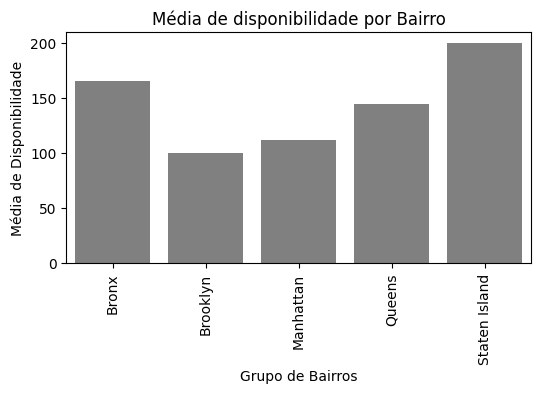

In [147]:
df_grouped = data.groupby('bairro_group')['disponibilidade_365'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['bairro_group'], y=df_grouped['disponibilidade_365'], color='grey')
plt.title('Média de disponibilidade por Bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Média de Disponibilidade')
plt.xticks(rotation=90)
plt.show()

**Média de Preço por Tipo de UH**

Nota-se uma diferança bastante significativa de preço da UH Entire home/apt em relação aos outros.

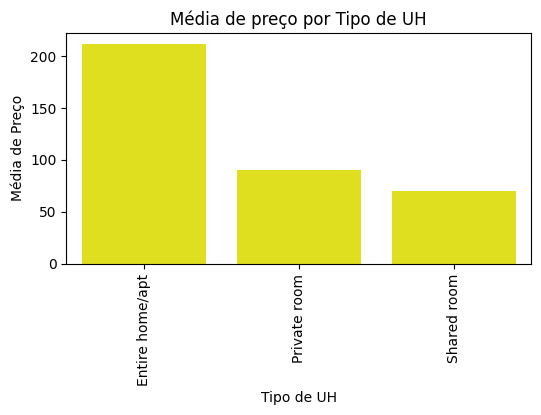

In [148]:
df_grouped = data.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['room_type'], y=df_grouped['price'], color='yellow')
plt.title('Média de preço por Tipo de UH')
plt.xlabel('Tipo de UH')
plt.ylabel('Média de Preço')
plt.xticks(rotation=90)
plt.show()

**Média de dias em que o anúncio está disponível para reserva por quarto**

Existe uma diferença significativa da média entre o tipo shared e os outros dois, geralmente os guests preferem optar por privacidade


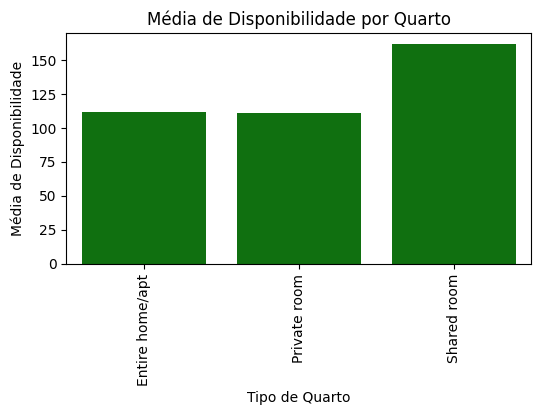

In [149]:
df_grouped = data.groupby('room_type')['disponibilidade_365'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['room_type'], y=df_grouped['disponibilidade_365'], color='green')
plt.title('Média de Disponibilidade por Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Média de Disponibilidade')
plt.xticks(rotation=90)
plt.show()

**Média de Número de Avaliações por Bairro**

Nota-se que os bairros com menor procura, menor concentração de anúncios por host e preços mais baixos possuem mais avaliações. Considerando que as pessoas geralmente não têm o hábito de dar feedback positivo quando têm uma boa experiência, e costumam fornecer feedback principalmente em casos de experiências negativas, pode-se dizer que as estadias de melhor qualidade estão em Manhattan e Brooklyn.

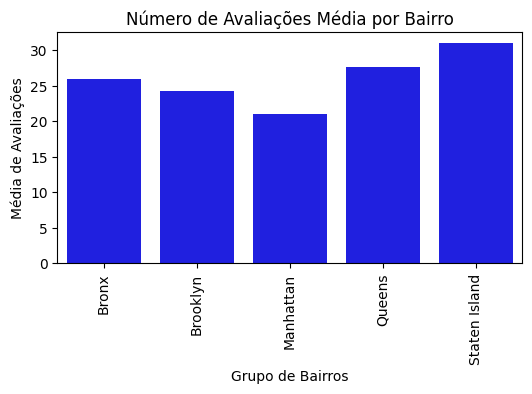

In [150]:
df_grouped = data.groupby('bairro_group')['numero_de_reviews'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=df_grouped['bairro_group'], y=df_grouped['numero_de_reviews'], color='blue')
plt.title('Número de Avaliações Média por Bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Média de Avaliações')
plt.xticks(rotation=90)
plt.show()

# Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra? 

- Acredito que os bairros Brooklyn e Manhattan sejam ótimas opções de investimento. A média de preço no Brooklyn, embora seja inferior à de Manhattan e muito próxima à de Staten Island, possui uma demanda muito alta, como mostra o gráfico de disponibilidade. Além disso, também é possível notar a baixa concorrência, ou seja, um bom local para explorar. Já Manhattan, apesar da grande concorrência, é o bairro mais caro e procurado, portanto, deve valer a pena.

- Indo um pouco além, acredito que investir no tipo de UH Entire home/apt seja um ótimo investimento, pois, segundo os gráficos, são o tipo mais caro, como mais demanda e com mais noites reservadas.

# Excluindo colunas que não serão necessárias e/ou com muitos valores únicos

In [151]:
data = data.drop(['nome','id', 'host_id', 'host_name', 'bairro', 'ultima_review', 'reviews_por_mes'], axis=1)
    

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   48894 non-null  object 
 1   latitude                       48894 non-null  float64
 2   longitude                      48894 non-null  float64
 3   room_type                      48894 non-null  object 
 4   price                          48894 non-null  int64  
 5   minimo_noites                  48894 non-null  int64  
 6   numero_de_reviews              48894 non-null  int64  
 7   calculado_host_listings_count  48894 non-null  int64  
 8   disponibilidade_365            48894 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.4+ MB


# Excluindo valores nulos

In [153]:
data = data.dropna()

# Convertendo as colunas "bairro_group" e "room_type" em identificadores númericos

In [154]:
data['bairro_group'], _=pd.factorize(data['bairro_group'])

In [155]:
data['room_type'], _=pd.factorize(data['room_type'])

In [156]:
data['bairro_group'].value_counts().sum

<bound method Series.sum of bairro_group
0    21661
1    20103
2     5666
4     1091
3      373
Name: count, dtype: int64>

In [157]:
data['room_type'].value_counts().sum

<bound method Series.sum of room_type
0    25409
1    22325
2     1160
Name: count, dtype: int64>

**verificando se está convertido**

In [158]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   48894 non-null  int64  
 1   latitude                       48894 non-null  float64
 2   longitude                      48894 non-null  float64
 3   room_type                      48894 non-null  int64  
 4   price                          48894 non-null  int64  
 5   minimo_noites                  48894 non-null  int64  
 6   numero_de_reviews              48894 non-null  int64  
 7   calculado_host_listings_count  48894 non-null  int64  
 8   disponibilidade_365            48894 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.4 MB


# Verificando Outliers

0 price
1 latitude
2 longitude
3 bairro_group
4 minimo_noites
5 numero_de_reviews
6 calculado_host_listings_count


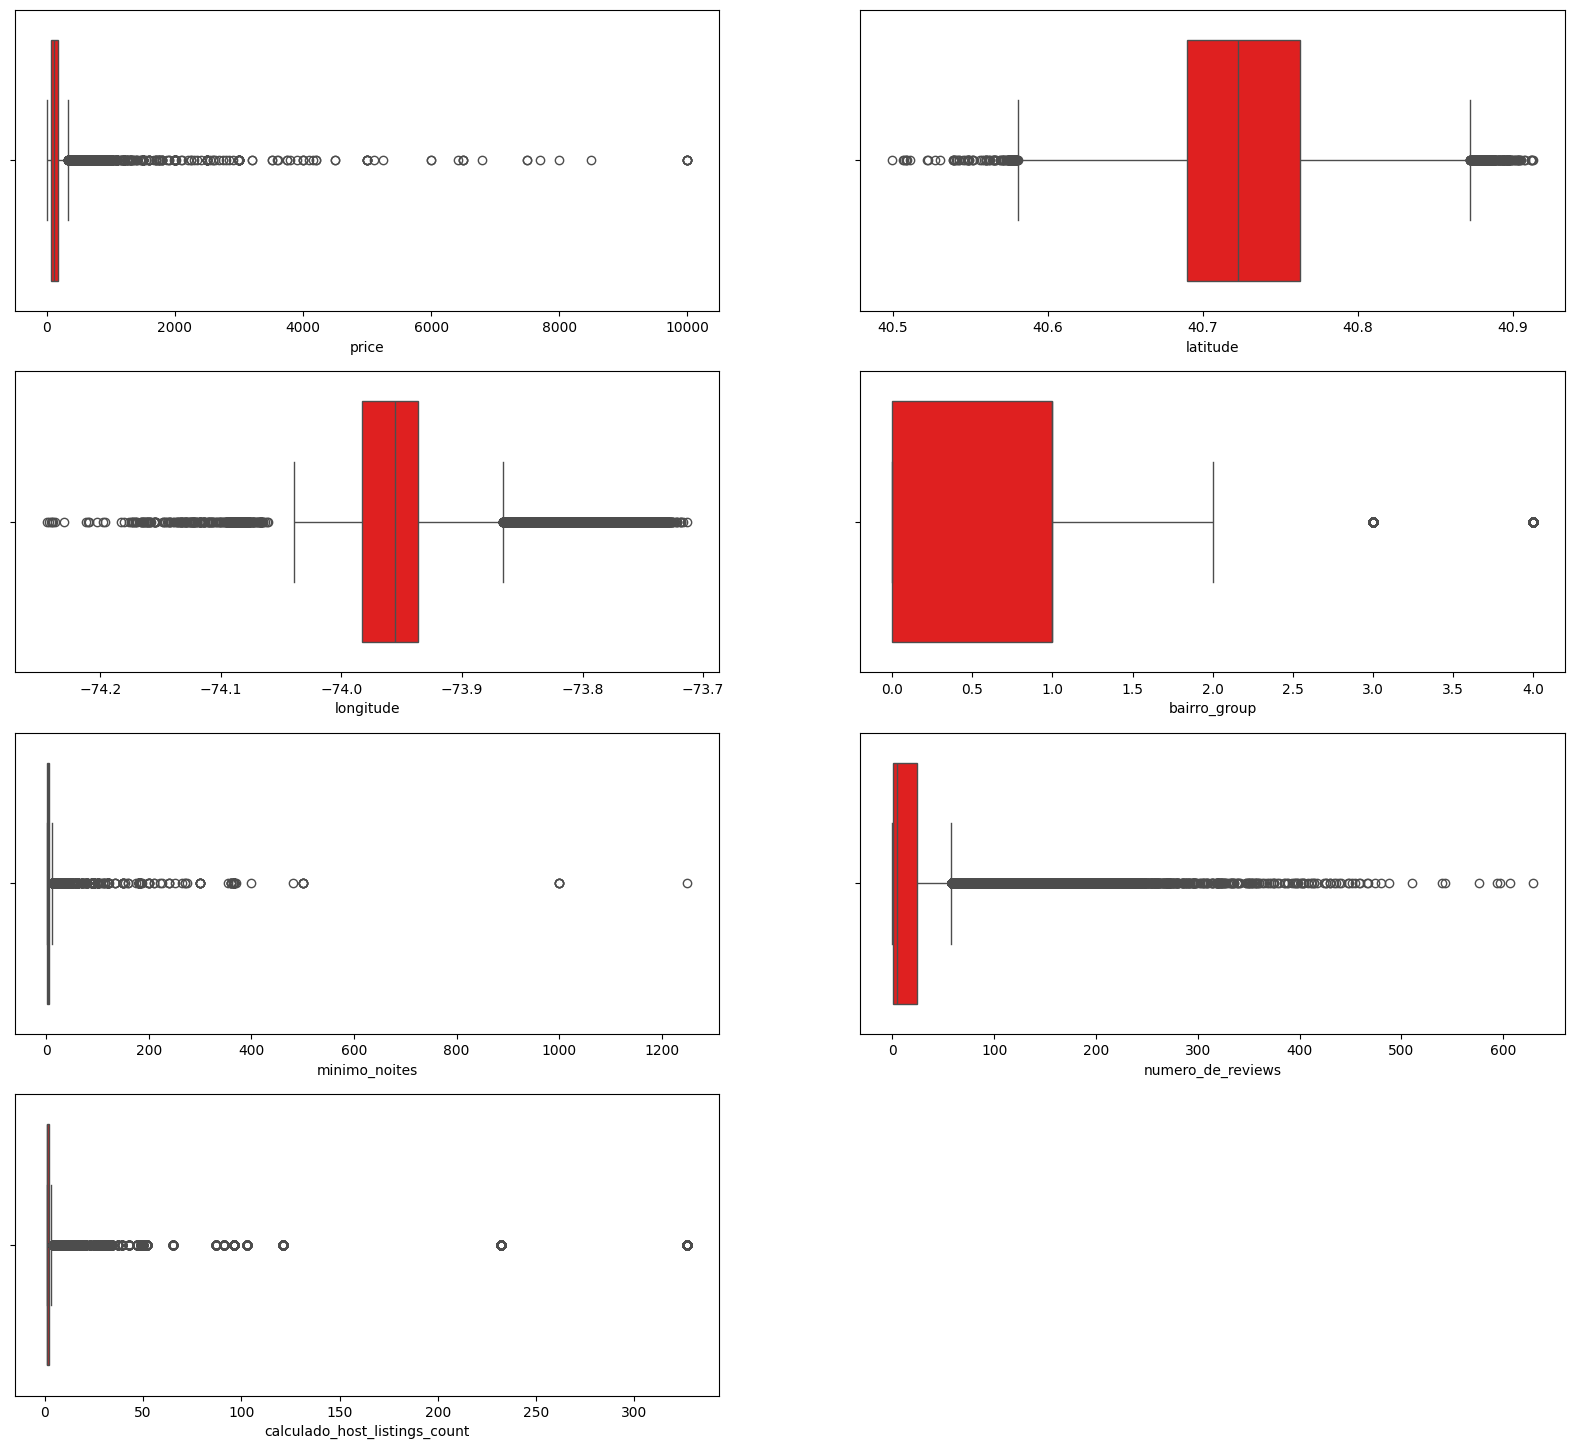

In [159]:
cols = ['price', 'latitude', 'longitude', 'bairro_group', 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(4,2,i+1)
    sns.boxplot(data, x = col, color = 'red')
plt.show()

# Excluindo Outliers

Depois de muita tentativa e erro, as métricas abaixo apresentaram o melhor resultado. O resultado final ficou significativamente melhor ao deixar os outliers de numero_de_reviews, minimo_noites e calculado_host_listings_count

In [160]:
data.drop(data[data['price'] > 290].index, axis = 0, inplace = True)

data.drop(data[data['latitude'] > 40.8].index, axis = 0, inplace = True)
data.drop(data[data['latitude'] < 40.6].index, axis = 0, inplace = True)

data.drop(data[data['longitude'] > -73.9].index, axis = 0, inplace = True)
data.drop(data[data['longitude'] < -74.0].index, axis = 0, inplace = True)

0 price
1 latitude
2 longitude
3 bairro_group
4 minimo_noites
5 numero_de_reviews
6 calculado_host_listings_count


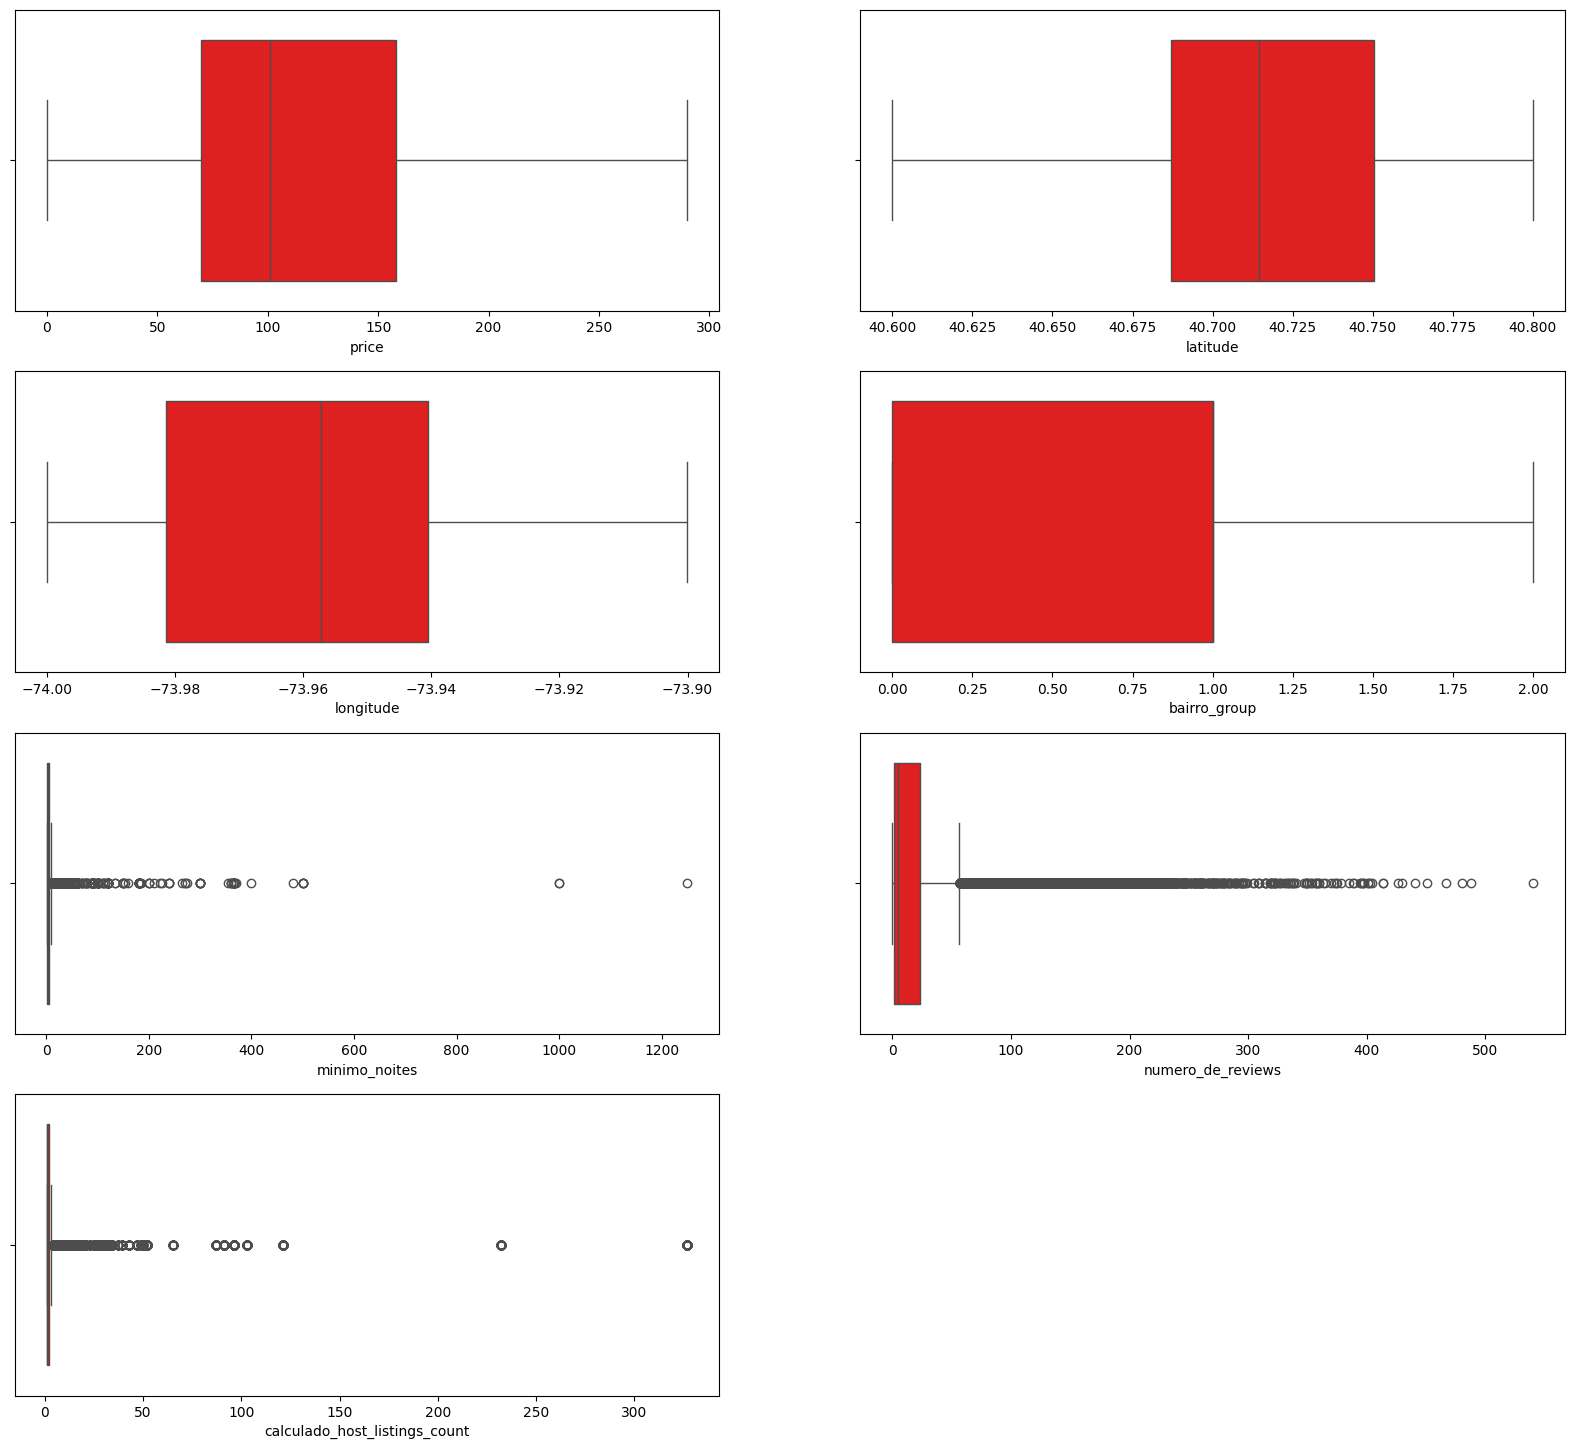

In [161]:
cols = ['price', 'latitude', 'longitude', 'bairro_group', 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(4,2,i+1)
    sns.boxplot(data, x = col, color = 'red')
plt.show()

# O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

- Conforme o gráfico abaixo, é possível notar que existe uma certa relação, embora distante, entre disponibilidade, número de noites e o preço. Na verdade, o que interfere fortemente no preço é o room_type, seguido pela longitude e pelo bairro_group.

<Axes: >

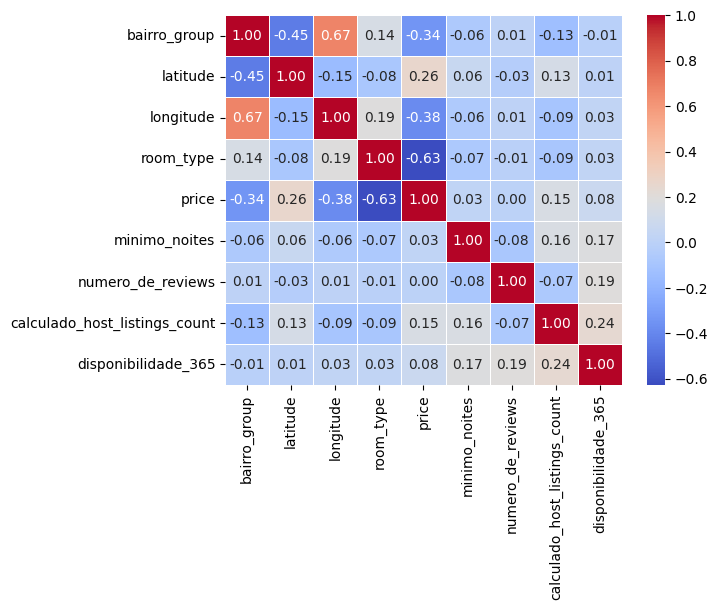

In [162]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', 
                linewidths = .5)

In [163]:
data.corr()['price']

bairro_group                    -0.344558
latitude                         0.258187
longitude                       -0.384908
room_type                       -0.626913
price                            1.000000
minimo_noites                    0.027599
numero_de_reviews                0.002300
calculado_host_listings_count    0.150931
disponibilidade_365              0.078484
Name: price, dtype: float64

# Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)

- Decidi utilizar nove variáveis: bairro_group, longitude, latitude, room_type, price, minimo_noites, numero_de_reviews, calculado_host_listings_count e disponibilidade_365. Primeiro, precisei transformar bairro_group e room_type em identificadores numéricos. Em seguida, ao analisar o heatmap, decidi manter apenas as variáveis que mais se correlacionavam com price, porém ao fazer a previsão, a porcentagem de erro era muito alta. Fiz vários testes eliminando algumas variáveis, mas obtive os melhores resultados utilizando as nove variáveis.
- Como o objetivo é prever um valor contínuo, se trata de um problema de regressão.
- Abaixo está o passo a passo de como fiz a previsão




**Separando X e Y**


In [164]:
X = data.drop('price', axis=1)
y = data["price"]

**Treino teste & split**

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Importação modelos**

In [166]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression

**Classificadores e fit**

In [167]:
reg_rlinear = linear_model.LinearRegression().fit(X_train, y_train)
reg_knn_3 = KNeighborsRegressor(n_neighbors= 5).fit(X_train, y_train)
reg_knn_5 = KNeighborsRegressor(n_neighbors= 7).fit(X_train, y_train)
reg_tree = tree.DecisionTreeRegressor().fit(X_train, y_train)
reg_RKNN = RadiusNeighborsRegressor(radius = 100).fit(X_train, y_train)
reg_rforest = RandomForestRegressor(n_estimators= 150, random_state=10).fit(X_train,y_train)
reg_Hub = HuberRegressor(max_iter = 300).fit(X_train, y_train)

**Fazendo a previsão**

In [168]:
y_pred_RL = reg_rlinear.predict(X_test)
y_pred_knn_3 = reg_knn_3.predict(X_test)
y_pred_knn_5 = reg_knn_5.predict(X_test)
y_pred_tree = reg_tree.predict(X_test)
y_pred_rknn = reg_RKNN.predict(X_test)
y_pred_rforest = reg_rforest.predict(X_test)
y_pred_hub = reg_Hub.predict(X_test)

C:\Users\viniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [169]:
y_test.mean()

118.85228965003724

**Avaliando a media do erro absoluto**

In [170]:
from sklearn.metrics import mean_absolute_error
print('Média do erro absoluto - Reg. Linear:', mean_absolute_error(y_test, y_pred_RL))
print('Média do erro absoluto - KNN_3:', mean_absolute_error(y_test, y_pred_knn_3))
print('Média do erro absoluto - KNN_5:', mean_absolute_error(y_test, y_pred_knn_5))
print('Média do erro absoluto - Árvore:', mean_absolute_error(y_test, y_pred_tree))
print('Média do erro absoluto - KNN_radius:', mean_absolute_error(y_test, y_pred_rknn))
print('Média do erro absoluto - Random Forest:', mean_absolute_error(y_test, y_pred_rforest))
print('Média do erro absoluto - Huber Regressor:', mean_absolute_error(y_test, y_pred_hub))

Média do erro absoluto - Reg. Linear: 32.376286892367254
Média do erro absoluto - KNN_3: 42.720569620253166
Média do erro absoluto - KNN_5: 42.39685937666206
Média do erro absoluto - Árvore: 39.92423678332092
Média do erro absoluto - KNN_radius: 858467240958238.5
Média do erro absoluto - Random Forest: 29.522871680317696
Média do erro absoluto - Huber Regressor: 33.31219408622243


**Percentagem dos erros de cada modelo**


In [171]:
print("Percentagem Reg. Linear:", round(((mean_absolute_error(y_test, y_pred_RL)/y_test.mean())*100),1),'%')
print("Percentagem KNN_3:", round(((mean_absolute_error(y_test, y_pred_knn_3)/y_test.mean())*100),1),'%')
print("Percentagem KNN_5:", round(((mean_absolute_error(y_test, y_pred_knn_5)/y_test.mean())*100),1),'%')
print("Percentagem Árvore:", round(((mean_absolute_error(y_test, y_pred_tree)/y_test.mean())*100),1),'%')
print("Percentagem KNN_radius:", round(((mean_absolute_error(y_test, y_pred_rknn)/y_test.mean())*100),1),'%')
print("Percentagem Random Forest:", round(((mean_absolute_error(y_test, y_pred_rforest)/y_test.mean())*100),1),'%')
print("Percentagem Huber Regressor:", round(((mean_absolute_error(y_test, y_pred_hub)/y_test.mean())*100),1),'%')

Percentagem Reg. Linear: 27.2 %
Percentagem KNN_3: 35.9 %
Percentagem KNN_5: 35.7 %
Percentagem Árvore: 33.6 %
Percentagem KNN_radius: 722297604434892.4 %
Percentagem Random Forest: 24.8 %
Percentagem Huber Regressor: 28.0 %


# Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

- O modelo que mais se aproximou dos dados foi o random forest, com porcentagem de erro de 24.8%. Prós: Robusto e versátil. Contras: Pode ser mais lento e menos interpretável do que modelos lineares.
- A medida de performance escolhida foi o erro absoluto médio(MAE) porque é mais simples e fácil de entender, também é menos sensível a outliers.


In [172]:
import pickle

modelo_final = reg_rforest

with open('modelo_final.pkl', 'wb') as arquivo:
    pickle.dump(modelo_final, arquivo)

print("Modelo salvo como 'modelo_final.pkl'")


Modelo salvo como 'modelo_final.pkl'


In [173]:
with open('modelo_final.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [174]:
apartamento = {
    'bairro_group': 'Manhattan',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

dados_entrada = pd.DataFrame([{
    'bairro_group': apartamento['bairro_group'],
    'latitude': apartamento['latitude'],
    'longitude': apartamento['longitude'],
    'room_type': apartamento['room_type'],
    'minimo_noites': apartamento['minimo_noites'],
    'numero_de_reviews': apartamento['numero_de_reviews'],
    'calculado_host_listings_count': apartamento['calculado_host_listings_count'],
    'disponibilidade_365': apartamento['disponibilidade_365']
}])

dados_entrada['bairro_group'], _ = pd.factorize(dados_entrada['bairro_group'])
dados_entrada['room_type'], _ = pd.factorize(dados_entrada['room_type'])

dados_entrada = dados_entrada[['bairro_group', 'latitude', 'longitude', 'room_type',
                                'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365']]

price_previsto = modelo_carregado.predict(dados_entrada)

print(f'O preço sugerido para o apartamento é: {price_previsto[0]:.2f}')

O preço sugerido para o apartamento é: 216.81


# Supondo um apartamento com as características acima, qual sua sugestão de preço?

- A sugestão foi de 216.81, uma margem de erro de 3.64%, tendo em vista que o valor na tabela que corresponde a essas características é 225.

In [175]:
# Gerando o arquivo requirements.txt
!pip freeze > requirements.txt

In [176]:
import os

arquivo = "modelo_final.pkl"
tamanho = os.path.getsize(arquivo) / (1024 * 1024)  # Converte para MB
print(f"Tamanho do arquivo: {tamanho:.2f} MB")


Tamanho do arquivo: 253.40 MB


In [177]:
import gdown

# Substitua pelo ID do seu arquivo no Google Drive
url = "https://drive.google.com/uc?id=SEU_ID_AQUI"
output = "modelo_final.pkl"

gdown.download(url, output, quiet=False)


ModuleNotFoundError: No module named 'gdown'